In [1]:
## 데이터 준비
mydata = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
mydata$admit = as.factor(mydata$admit)
mydata$rank = as.factor(mydata$rank)

In [2]:
set.seed(123)
install.packages("caret")
library(caret)
my.ind = createDataPartition(y = mydata$admit, p = 0.75, list = FALSE)
my.training = mydata[my.ind, ]
my.val = mydata[-my.ind, ]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



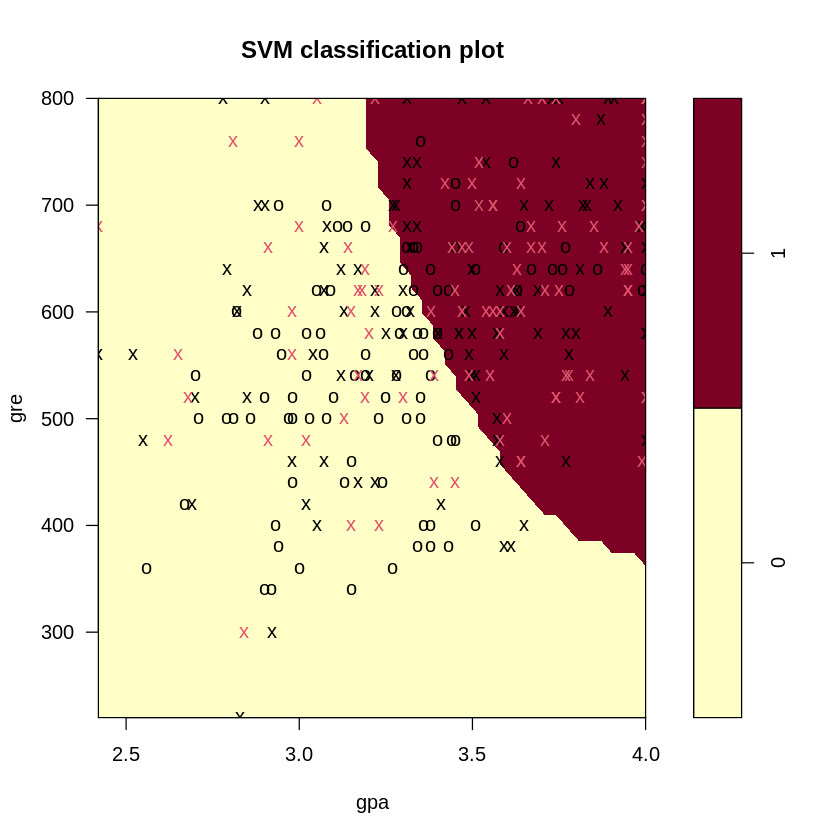

In [3]:
## SVM 적합
install.packages("e1071")
library(e1071)
set.seed(123)
svm.fit1 = svm(admit ~ ., data = my.training, cost = 1)
set.seed(123)
svm.fit5 = svm(admit ~ ., data = my.training, cost = 5)
set.seed(123)
svm.fit10 = svm(admit ~ ., data = my.training, cost = 10)
set.seed(123)
svm.fit100 = svm(admit ~ ., data = my.training, cost = 100)
plot(svm.fit1, my.training, gre ~ gpa, slice = list(gre = 3, gpa = 4))

In [4]:
## SVM 적합 모형을 통한 예측
svm.pred1 = predict(svm.fit1, newdata = my.val, type= "response")
svm.pred5 = predict(svm.fit5, newdata = my.val, type= "response")
svm.pred10 = predict(svm.fit10, newdata = my.val, type= "response")
svm.pred100 = predict(svm.fit100, newdata = my.val, type= "response")

In [8]:
## confustion matrix를 통한 예측 결과 비교
confusionMatrix(my.val$admit, svm.pred1)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 66  2
         1 25  6
                                         
               Accuracy : 0.7273         
                 95% CI : (0.6285, 0.812)
    No Information Rate : 0.9192         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.2056         
                                         
 Mcnemar's Test P-Value : 2.297e-05      
                                         
            Sensitivity : 0.7253         
            Specificity : 0.7500         
         Pos Pred Value : 0.9706         
         Neg Pred Value : 0.1935         
             Prevalence : 0.9192         
         Detection Rate : 0.6667         
   Detection Prevalence : 0.6869         
      Balanced Accuracy : 0.7376         
                                         
       'Positive' Class : 0              
                                         

In [5]:
confusionMatrix(my.val$admit, svm.pred5)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 66  2
         1 25  6
                                         
               Accuracy : 0.7273         
                 95% CI : (0.6285, 0.812)
    No Information Rate : 0.9192         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.2056         
                                         
 Mcnemar's Test P-Value : 2.297e-05      
                                         
            Sensitivity : 0.7253         
            Specificity : 0.7500         
         Pos Pred Value : 0.9706         
         Neg Pred Value : 0.1935         
             Prevalence : 0.9192         
         Detection Rate : 0.6667         
   Detection Prevalence : 0.6869         
      Balanced Accuracy : 0.7376         
                                         
       'Positive' Class : 0              
                                         

In [6]:
confusionMatrix(my.val$admit, svm.pred10)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 66  2
         1 26  5
                                          
               Accuracy : 0.7172          
                 95% CI : (0.6178, 0.8031)
    No Information Rate : 0.9293          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1671          
                                          
 Mcnemar's Test P-Value : 1.383e-05       
                                          
            Sensitivity : 0.7174          
            Specificity : 0.7143          
         Pos Pred Value : 0.9706          
         Neg Pred Value : 0.1613          
             Prevalence : 0.9293          
         Detection Rate : 0.6667          
   Detection Prevalence : 0.6869          
      Balanced Accuracy : 0.7158          
                                          
       'Positive' Class : 0               
                                    

In [7]:
confusionMatrix(my.val$admit, svm.pred100)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 63  5
         1 24  7
                                          
               Accuracy : 0.7071          
                 95% CI : (0.6071, 0.7943)
    No Information Rate : 0.8788          
    P-Value [Acc > NIR] : 0.9999987       
                                          
                  Kappa : 0.1827          
                                          
 Mcnemar's Test P-Value : 0.0008302       
                                          
            Sensitivity : 0.7241          
            Specificity : 0.5833          
         Pos Pred Value : 0.9265          
         Neg Pred Value : 0.2258          
             Prevalence : 0.8788          
         Detection Rate : 0.6364          
   Detection Prevalence : 0.6869          
      Balanced Accuracy : 0.6537          
                                          
       'Positive' Class : 0               
                                    